In [34]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

In [39]:
B_exp = 9
N = 5000
eps_list = np.geomspace(0.1, 5, 10)
alpha = 0.05
c = 1.

eps_to_idx = {eps: i for i, eps in enumerate(eps_list)}

In [41]:
c = 0.6
c_str = f"{c:.2f}".replace(".", "")
c = 1.
c_str_2 = f"{c:.2f}".replace(".", "")

with open(f'results/naive_noisy_binary_search/N_{N}/B_exp_{B_exp}/success.pkl', 'rb') as f:
    success_noisy = pickle.load(f)
with open(f'results/gretta_price/N_{N}/B_exp_{B_exp}/success.pkl', 'rb') as f:
    success_GP = pickle.load(f)
with open(f'results/final_gretta_price_optimized/N_{N}/B_exp_{B_exp}/c_{c_str}/success.pkl', 'rb') as f:
    success_GP_opt = pickle.load(f)
with open(f'results/final_gretta_price_optimized/N_{N}/B_exp_{B_exp}/c_{c_str_2}/success.pkl', 'rb') as f:
    success_fi_GP_opt = pickle.load(f)
with open(f'results/hierarchical_mechanism/N_{N}/B_exp_{B_exp}/success.pkl', 'rb') as f:
    success_h = pickle.load(f)
    
with open(f'results/naive_noisy_binary_search/N_{N}/B_exp_{B_exp}/errors.pkl', 'rb') as f:
    error_noisy = pickle.load(f)
with open(f'results/gretta_price/N_{N}/B_exp_{B_exp}/errors.pkl', 'rb') as f:
    error_GP = pickle.load(f)
with open(f'results/final_gretta_price_optimized/N_{N}/B_exp_{B_exp}/c_{c_str}/errors.pkl', 'rb') as f:
    error_GP_opt = pickle.load(f)
with open(f'results/final_gretta_price_optimized/N_{N}/B_exp_{B_exp}/c_{c_str_2}/errors.pkl', 'rb') as f:
    error_fi_GP_opt = pickle.load(f)
with open(f'results/hierarchical_mechanism/N_{N}/B_exp_{B_exp}/errors.pkl', 'rb') as f:
    error_h = pickle.load(f)
    
with open(f'results/naive_noisy_binary_search/N_{N}/B_exp_{B_exp}/coins.pkl', 'rb') as f:
    coins_noisy = pickle.load(f)
with open(f'results/gretta_price/N_{N}/B_exp_{B_exp}/coins.pkl', 'rb') as f:
    coins_GP = pickle.load(f)
with open(f'results/final_gretta_price_optimized/N_{N}/B_exp_{B_exp}/c_{c_str}/coins.pkl', 'rb') as f:
    coins_GP_opt = pickle.load(f)
with open(f'results/final_gretta_price_optimized/N_{N}/B_exp_{B_exp}/c_{c_str_2}/coins.pkl', 'rb') as f:
    coins_fi_GP_opt = pickle.load(f)
with open(f'results/hierarchical_mechanism/N_{N}/B_exp_{B_exp}/coins.pkl', 'rb') as f:
    coins_h = pickle.load(f)

# Success rate vs. $\varepsilon$ plot

In [42]:
def get_binomial_std(p, n):
    return np.sqrt(p*(1-p)/n)

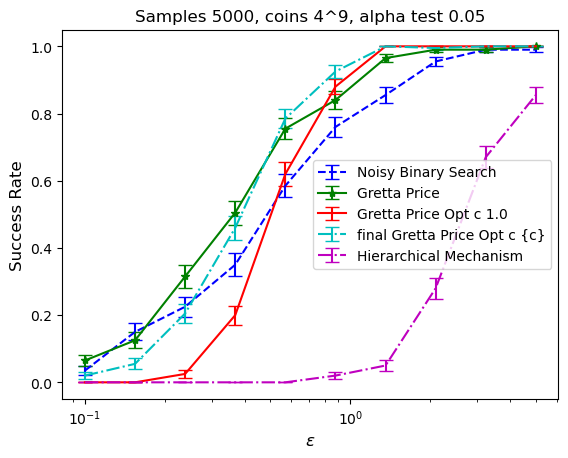

In [43]:
data = [success_noisy, success_GP, success_GP_opt, success_fi_GP_opt, success_h]
labels = ["Noisy Binary Search", "Gretta Price", f"Gretta Price Opt c {c}", "final Gretta Price Opt c {c}", "Hierarchical Mechanism"]
markers = ['--', '-*', '-' , '-.', '-.']
colors = ['b', 'g', 'r', 'c', 'm']

folder_name = "success_vs_eps"
os.makedirs(f"figures/{folder_name}", exist_ok=True)
figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"

for i, success in enumerate(data):
    plt.errorbar(eps_list, 
                 np.mean(success, axis=1), 
                 yerr=get_binomial_std(np.mean(success, axis=1), success.shape[1]), 
                 fmt=markers[i], 
                 label=labels[i], 
                 color=colors[i],
                 capsize=5)
plt.xscale('log')
plt.xlabel(r'$\varepsilon$', fontsize = 12)
plt.ylabel('Success Rate', fontsize = 12)
plt.title(f"Samples {N}, coins 4^{B_exp}, alpha test {alpha}")
plt.legend()
plt.savefig(os.path.join("figures", folder_name, figure_name))
plt.show()

# Error vs. $\varepsilon$ plot

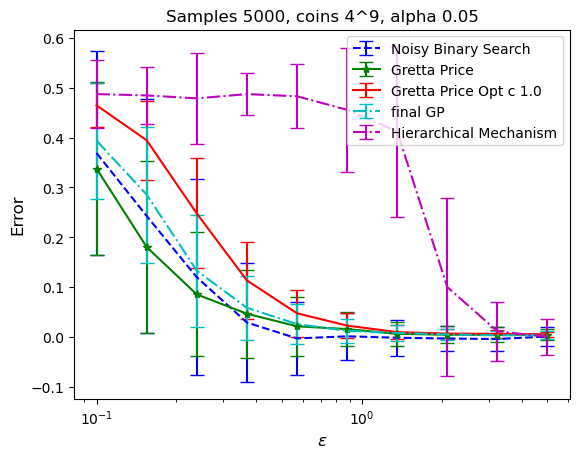

In [47]:
data = [error_noisy, error_GP, error_GP_opt, error_fi_GP_opt, error_h]
labels = ["Noisy Binary Search", "Gretta Price", f"Gretta Price Opt c {c}", "final GP", "Hierarchical Mechanism"]
markers = ['--', '-*', '-' , '-.', '-.']
colors = ['b', 'g', 'r', 'c', 'm']

# folder_name = "error_vs_eps"
# os.makedirs(f"figures/{folder_name}", exist_ok=True)
# figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"

for i, error in enumerate(data):
    plt.errorbar(eps_list, 
                 np.mean(error, axis=1), 
                 yerr=np.std(error, axis=1),
                 fmt=markers[i], 
                 label=labels[i], 
                 color=colors[i],
                 capsize=5)
plt.xscale('log')
plt.xlabel(r'$\varepsilon$', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
plt.title(f"Samples {N}, coins 4^{B_exp}, alpha {alpha}")
plt.legend()
# plt.savefig(os.path.join("figures", folder_name, figure_name))
plt.show()

# CDF of accuracy

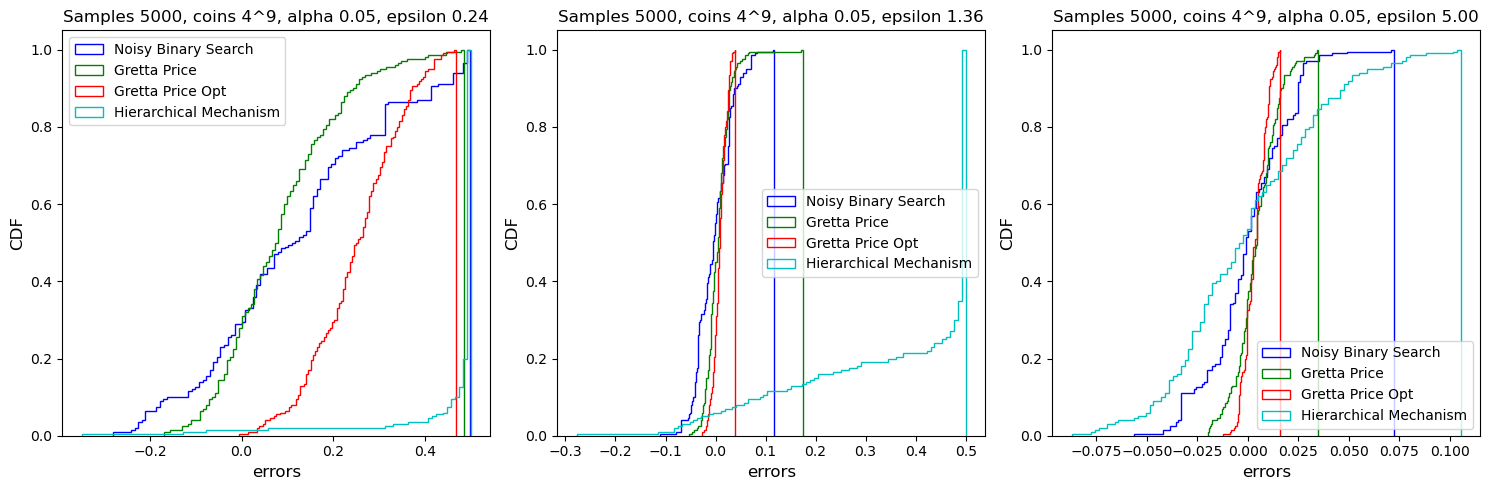

In [24]:
# make three plots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, eps_id in enumerate([2,6,9]):
    eps = eps_list[eps_id]
    
    eps_id = eps_to_idx[eps]
    data = [error_noisy, error_GP, error_GP_opt, error_h]
    labels = ["Noisy Binary Search", "Gretta Price", "Gretta Price Opt", "Hierarchical Mechanism"]
    colors = ['b', 'g', 'r', 'c']
    
    for j, errors in enumerate(data):
        axs[i].hist(errors[eps_id], bins=100, density=True, histtype='step', cumulative=True, label=labels[j], color=colors[j])
    axs[i].set_xlabel('errors', fontsize = 12)
    axs[i].set_ylabel('CDF', fontsize = 12)
    axs[i].set_title(f"Samples {N}, coins 4^{B_exp}, alpha {alpha}, epsilon {eps:.2f}")
    axs[i].legend()
folder_name = f"cdf_error"
os.makedirs(f"figures/{folder_name}", exist_ok=True)
figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"
plt.tight_layout()
# save
plt.savefig(os.path.join("figures", folder_name, figure_name))
plt.show()